In [1]:
import networkx as nx
import json
import powerlaw
import numpy as np
import matplotlib.pyplot as plt


def test(keywords):

    # Step 1: Load the GML graph
    gml_filename = f"{keywords}.gml"
    G = nx.read_gml(gml_filename, label='id')

    # Step 2: Relabel the nodes with numbers from 0 to the number of nodes
    G = nx.convert_node_labels_to_integers(G, label_attribute='original_label')

    # Step 3: Save the NetworkX graph as an edge list
    edgelist_filename = f"{keywords}.edgelist"
    nx.write_edgelist(G, edgelist_filename, data=False)

  
    # Step 4: Extract and save the 'gt' attribute as a list in a separate file
    gt_list = [str(G.nodes[node]['gt']) for node in G.nodes()]  # Convert to string
    membership_filename = f"{keywords}.membership"
    with open(membership_filename, 'w') as f:
        for gt_value in gt_list:
            f.write(gt_value + "\n")  # Write the value and add a newline character


    print("Graph transformation and file saving completed.")




    # Calculate the degree sequence
    degree_sequence = [degree for node, degree in G.degree()]

    # Create a log-log plot of the degree sequence
    plt.loglog(sorted(degree_sequence, reverse=True), marker='o', linestyle='none')
    plt.title("Degree Sequence (Log-Log)")
    #plt.xlabel("Rank (log scale)")
    #plt.ylabel("Degree (log scale)")
    plt.grid(True)
    plt.show()



    # Your input string
    with open(f"{keywords}.membership", "r") as file:
        # Read the entire contents of the file into a string
        file_contents = file.read()

    # Remove square brackets and split the string into individual items
    items = file_contents.strip('[]').split(', ')

    # Create a list with each item enclosed in double quotes
    membership_list = [item.strip('"') for item in items]

    # Print the resulting list
    from collections import Counter

    frequency_sequence = Counter(membership_list)

    #print(list(frequency_sequence.values()))

    plt.loglog(sorted(list(frequency_sequence.values()), reverse=True), marker='o', linestyle='none')
    plt.title("Community Size Sequence (Log-Log)")
    #plt.xlabel("Rank (log scale)")
    #plt.ylabel("Degree (log scale)")
    plt.grid(True)
    plt.show()


    print("Now we test degree sequence:")
    # Step 1: Install the 'powerlaw' package (if not already installed)
    # !pip install powerlaw

    # Step 2: Import the necessary libraries and load your data
    # Example data (replace with your own data)
    data = degree_sequence
    #data = list(frequency_sequence.values())

    # Step 3: Fit a power-law model to your data
    fit = powerlaw.Fit(data)

    # Step 4: Plot the PDF and CCDF of the data and fitted power-law model
    figPDF = fit.plot_pdf(color='b', marker='o', linestyle='-', linewidth=2)
    fit.power_law.plot_pdf(color='b', linestyle='--', ax=figPDF)

    figCCDF = fit.plot_ccdf(color='r', marker='o', linestyle='-', linewidth=2)
    fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)

    # Step 5: Examine the results and perform a goodness-of-fit test
    alpha = fit.power_law.alpha
    result = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
    #p_value = result[0]

    print(f"Estimated alpha: {alpha}")
    print(f"Power Law and Exponential Law Distributions Compare: {result[0]}")


    plt.show()

    print("Now we test community sizes:")
    # Step 1: Install the 'powerlaw' package (if not already installed)
    # !pip install powerlaw

    # Step 2: Import the necessary libraries and load your data


    # Example data (replace with your own data)
    data = list(frequency_sequence.values())

    # Step 3: Fit a power-law model to your data
    fit = powerlaw.Fit(data)

    # Step 4: Plot the PDF and CCDF of the data and fitted power-law model
    figPDF = fit.plot_pdf(color='b', marker='o', linestyle='-', linewidth=2)
    fit.power_law.plot_pdf(color='b', linestyle='--', ax=figPDF)

    figCCDF = fit.plot_ccdf(color='r', marker='o', linestyle='-', linewidth=2)
    fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)

    # Step 5: Examine the results and perform a goodness-of-fit test
    alpha = fit.power_law.alpha
    result = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
    #p_value = result[0]

    print(f"Estimated alpha: {alpha}")
    print(f"Power Law and Exponential Law Distributions Compare: {result[0]}")


    plt.show()

Graph transformation and file saving completed.


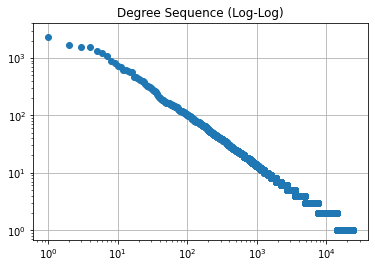

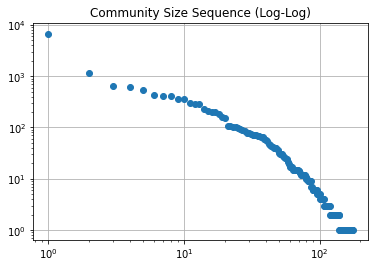

Now we test degree sequence:
Calculating best minimal value for power law fit
Estimated alpha: 2.1716214098558586
Power Law and Exponential Law Distributions Compare: 7.970937627349341


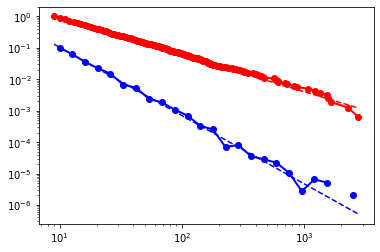

Now we test community sizes:
Calculating best minimal value for power law fit
Estimated alpha: 1.8265732239249277
Power Law and Exponential Law Distributions Compare: 2.777301105364988


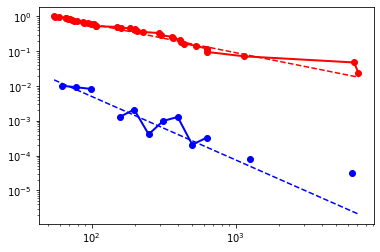

In [2]:
test("as")

Graph transformation and file saving completed.


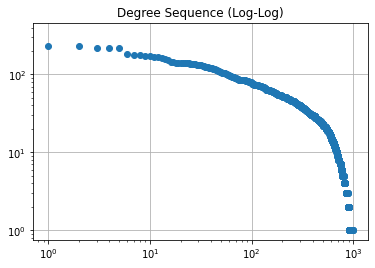

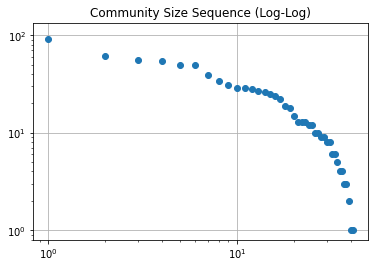

Now we test degree sequence:
Calculating best minimal value for power law fit
Estimated alpha: 5.547380070731898
Power Law and Exponential Law Distributions Compare: 0.6842368373890066


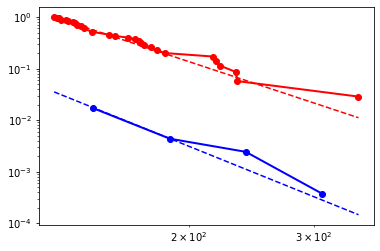

Now we test community sizes:
Calculating best minimal value for power law fit
Estimated alpha: 2.7642482230327046
Power Law and Exponential Law Distributions Compare: -0.3324519041620192


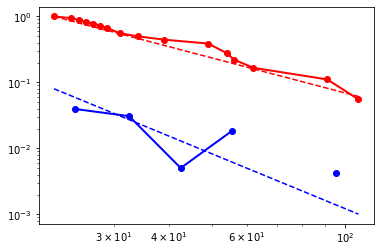

In [3]:
test("eu-core")

Graph transformation and file saving completed.


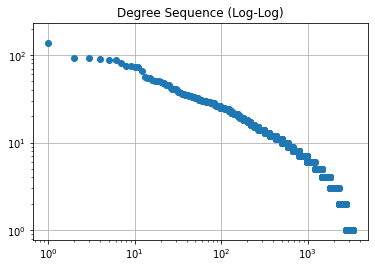

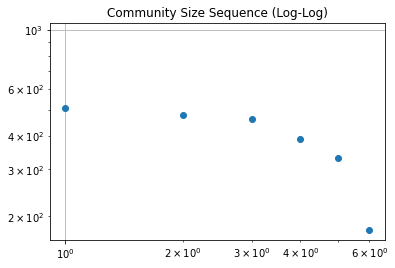

Now we test degree sequence:
Calculating best minimal value for power law fit
Estimated alpha: 3.5798706567094944
Power Law and Exponential Law Distributions Compare: 2.3499193908031537


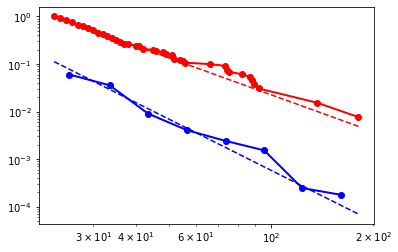

Now we test community sizes:
Calculating best minimal value for power law fit
Estimated alpha: 5.54499443557335
Power Law and Exponential Law Distributions Compare: 1.176585729737406


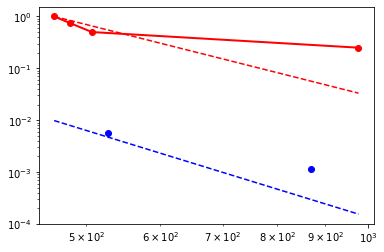

In [4]:
test("Artificial_Intelligence__Machine_Learning")

Graph transformation and file saving completed.


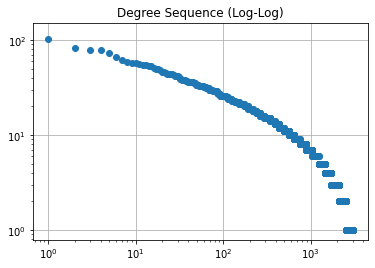

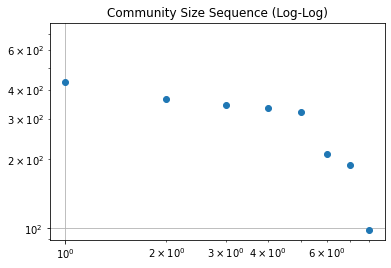

Now we test degree sequence:
Calculating best minimal value for power law fit
Estimated alpha: 4.155971967013704
Power Law and Exponential Law Distributions Compare: 1.0552406744985006


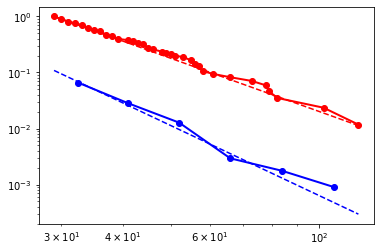

Now we test community sizes:
Calculating best minimal value for power law fit
Estimated alpha: 5.548637990835793
Power Law and Exponential Law Distributions Compare: 1.265100894443984


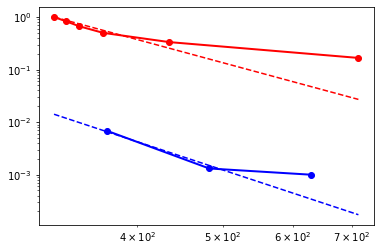

In [5]:
test("Programming")

Graph transformation and file saving completed.


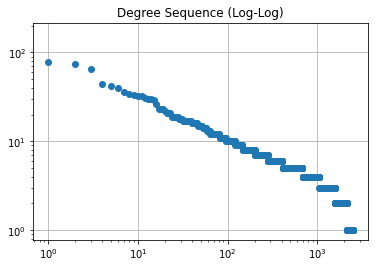

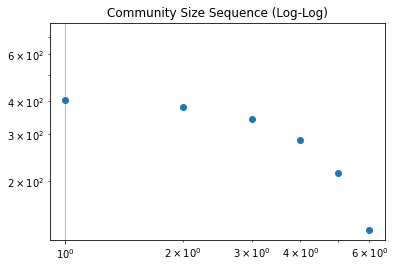

Now we test degree sequence:
Calculating best minimal value for power law fit
Estimated alpha: 3.6759227664893532
Power Law and Exponential Law Distributions Compare: 3.9235795735639827


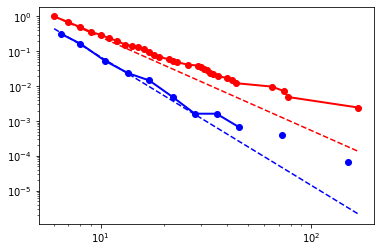

Now we test community sizes:
Calculating best minimal value for power law fit
Estimated alpha: 4.962301053579333
Power Law and Exponential Law Distributions Compare: 0.7420905879660009


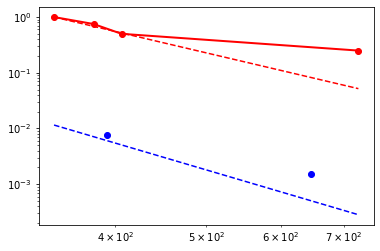

In [6]:
test("cora")

Graph transformation and file saving completed.


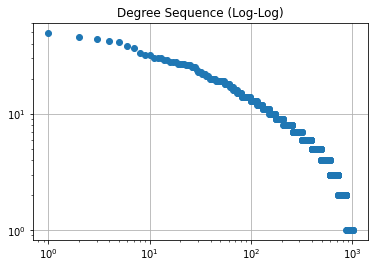

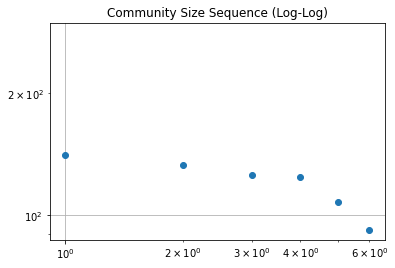

Now we test degree sequence:
Calculating best minimal value for power law fit
Estimated alpha: 2.9207367159462834
Power Law and Exponential Law Distributions Compare: 2.885248167365765


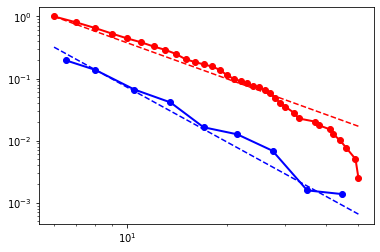

Now we test community sizes:
Calculating best minimal value for power law fit
Estimated alpha: 5.8254549275953105
Power Law and Exponential Law Distributions Compare: 1.8800520066978492


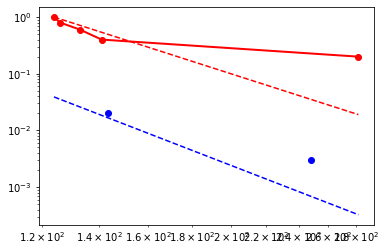

In [7]:
test("Databases")

Graph transformation and file saving completed.


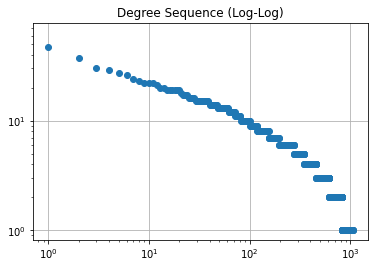

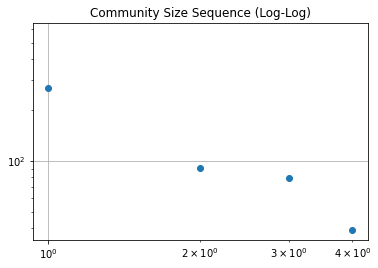

Now we test degree sequence:
Calculating best minimal value for power law fit
Estimated alpha: 4.240403247858484
Power Law and Exponential Law Distributions Compare: 1.0101207392247165


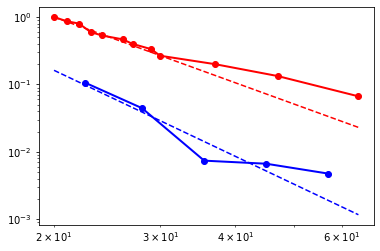

Now we test community sizes:
Calculating best minimal value for power law fit
Estimated alpha: 1.8096979538638354
Power Law and Exponential Law Distributions Compare: 0.1084066611315238


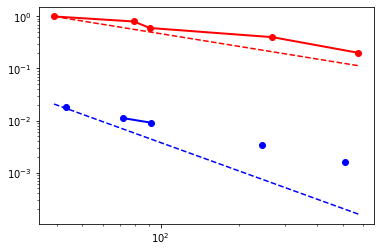

In [8]:
test("Human_Computer_Interaction")

Graph transformation and file saving completed.


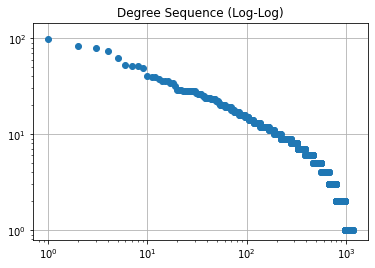

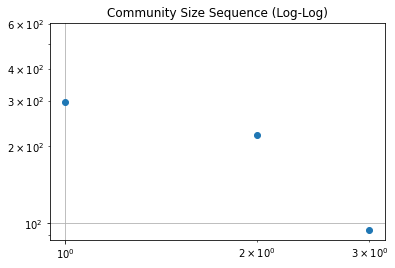

Now we test degree sequence:
Calculating best minimal value for power law fit
Estimated alpha: 3.099862442646352
Power Law and Exponential Law Distributions Compare: 2.55879890988594


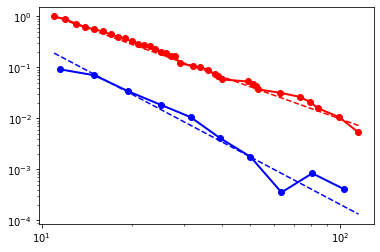

Now we test community sizes:
Calculating best minimal value for power law fit
Estimated alpha: 3.466344976796881
Power Law and Exponential Law Distributions Compare: 0.09441909013331354


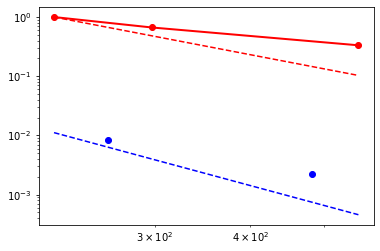

In [9]:
test("Networking")

Graph transformation and file saving completed.


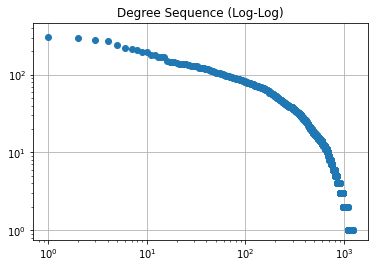

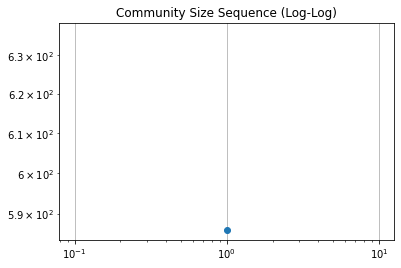

Now we test degree sequence:
Calculating best minimal value for power law fit
Estimated alpha: 3.6938280435757456
Power Law and Exponential Law Distributions Compare: 0.781770610166938


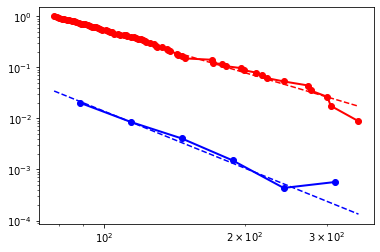

Now we test community sizes:
Calculating best minimal value for power law fit
Estimated alpha: 25.426355062257922
Power Law and Exponential Law Distributions Compare: 0.009749296352699097


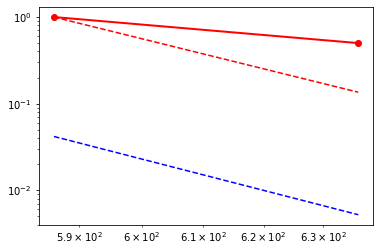

In [10]:
test("polblogs")